# Project - Predicting census income dataset

In this notebook I try to apply the classification algorithms such as K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression, and find the best one for this specific dataset by accuracy evaluation methods. 


In [2]:
# Setup
#Before we get the data and start exploring it, let's download all the libraries that we will need.

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h2>Reading the data set and adding the related headers.</h2>

 Python list <b>headers</b> containing name of headers 

In [48]:
headers = ["Age","workclass","fnlwgt","education","education-num", "marital-status","occupation",
         "relationship","race","Gender", "capital-gain","capital-loss","hours-per-week","native-country","Income"]

## About the census income dataset
This dataset is about census income and the goal is to predict whether income exceeds $50K/yr based on census data. The data set includes details of 15 variables and 32560 records whose income are greater than 50k per year in us dollars or less. 
The dataset doesn't contains header row, so the list of column names to use is passed explicitly. Set the parameter "names" equal to the Python list "headers". We load a dataset using Pandas library.

In [49]:
df = pd.read_excel(r"C:\Users\abera\Desktop\project\section_3\census_income_dataset.xlsx", names = headers)


In [50]:
# To see what the data set looks like, we'll use the head() method to display the first five rows of the dataframe.
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data visualization and pre-processing

Let’s see how many of each income category is in our data set

In [51]:
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

24719 people earn less than or eaqual to 50k anually while 7841 earn greater than 50k in us dollars.  

Lets plot some columns to underestand data better:



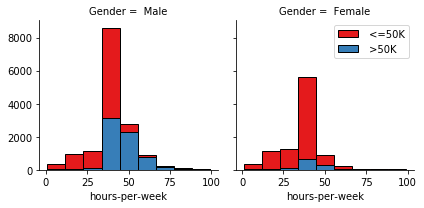

In [52]:
bins = np.linspace(df['hours-per-week'].min(), df['hours-per-week'].max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Income", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hours-per-week', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

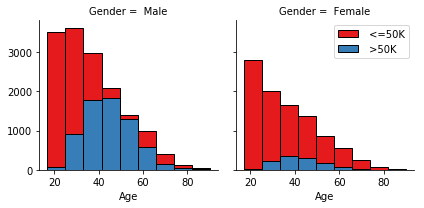

In [53]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Income", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

### Convert Categorical features to numerical values¶


Lets look at the variable sex:


In [54]:
df.groupby(['Gender'])['Income'].value_counts(normalize=True)

Gender   Income
 Female   <=50K    0.890539
          >50K     0.109461
 Male     <=50K    0.694249
          >50K     0.305751
Name: Income, dtype: float64

89 % of female earn under 50k while only 69 % of males earn bellow 50k anually. Conversely around 30 percent of males earn more than 50k but only 10 percent of females earn above 50k anually.



Lets convert male to 0 and female to 1:

In [55]:
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1], inplace=True)


In [56]:
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [57]:
df.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
Gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object